In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, pearsonr, mannwhitneyu, chi2_contingency

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df = pd.read_csv('/content/drive/MyDrive/top_10000_1960-now.csv')
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [4]:
df.shape

(9999, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

In [6]:
df['Album Genres']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9994   NaN
9995   NaN
9996   NaN
9997   NaN
9998   NaN
Name: Album Genres, Length: 9999, dtype: float64

In [8]:
df = df.drop(columns=["Album Genres", "Track URI", "Artist URI(s)", "Album URI",
                      "Album Artist URI(s)", "Album Image URL", "Disc Number",
                      "Track Number", "Track Preview URL", "ISRC","Added By", "Copyrights"])
df.head()

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Track Duration (ms),Explicit,Popularity,Added At,Artist Genres,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,216270,False,0,2020-03-05T09:20:39Z,"acid house,ambient house,big beat,hip house",...,-12.305,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,237120,False,64,2021-08-08T09:26:31Z,"dance pop,miami hip hop,pop",...,-5.995,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,312533,False,56,2021-08-08T09:26:31Z,"dance pop,pop",...,-5.171,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,233400,False,42,2021-08-08T09:26:31Z,"album rock,art rock,british invasion,classic r...",...,-8.920,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,1969-12-05,448720,False,0,2021-08-08T09:26:31Z,"album rock,british invasion,classic rock,rock",...,-9.611,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group


In [9]:
# Function to safely parse a date and return whether an error occurred
def safe_date_parse(date):
    try:
        pd.to_datetime(date)
        return False  # No error
    except Exception:
        return True  # Error occurred

# Apply the function to the 'Album Release Date' column and find problematic entries
problematic_dates = df['Album Release Date'].apply(safe_date_parse)

# Display the problematic dates
df[problematic_dates]

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Track Duration (ms),Explicit,Popularity,Added At,Artist Genres,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
1190,NaN,NaN,NaN,Various Artists,0000,0,False,0,2021-08-08T09:26:31Z,NaN,...,-4.435,1.0,0.0387,0.0588,0.0,0.121,0.963,104.019,4.0,NaN


In [10]:
# Remove the problematic row from the DataFrame
df = df[~problematic_dates]

In [40]:
data = df.copy()

In [41]:
data['Album Release Date'] = pd.to_datetime(data['Album Release Date'])

OutOfBoundsDatetime: ignored

In [ ]:
data['Album Release Year'] = data['Album Release Date'].dt.year

In [15]:
data.isnull().sum()

Track Name                0
Artist Name(s)            0
Album Name                0
Album Artist Name(s)      2
Album Release Date        2
Track Duration (ms)       0
Explicit                  0
Popularity                0
Added At                  0
Artist Genres           549
Danceability              2
Energy                    2
Key                       2
Loudness                  2
Mode                      2
Speechiness               2
Acousticness              2
Instrumentalness          2
Liveness                  2
Valence                   2
Tempo                     2
Time Signature            2
Label                     5
Album Release Year        2
dtype: int64

Not much of missing values! So let's just drop them all.

In [ ]:
data = data.dropna()

Duplicated?

In [17]:
sum(data.duplicated())

48

In [18]:
data = data[~data.duplicated()].reset_index(drop=True)

In [19]:
data.shape

(9398, 24)

In [20]:
numerical_stats = data.describe()
numerical_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
Track Duration (ms),9398.0,225581.422217,54105.004556,91226.000000,193379.250000,220457.500000,251236.500000,1561133.000
Popularity,9398.0,38.479251,29.596893,0.000000,0.000000,44.000000,64.000000,98.000
Danceability,9398.0,0.608072,0.145729,0.000000,0.515000,0.617000,0.709000,0.988
Energy,9398.0,0.685279,0.189791,0.000020,0.564000,0.713000,0.836000,0.997
Key,9398.0,5.179081,3.584425,0.000000,2.000000,5.000000,8.000000,11.000
Loudness,9398.0,-7.193692,3.249389,-29.368000,-8.897500,-6.446500,-4.857250,2.769
Mode,9398.0,0.697276,0.459461,0.000000,0.000000,1.000000,1.000000,1.000
Speechiness,9398.0,0.065565,0.061884,0.000000,0.033125,0.043100,0.067900,0.711
Acousticness,9398.0,0.204509,0.245893,0.000003,0.018200,0.092600,0.308750,0.987
Instrumentalness,9398.0,0.026922,0.117063,0.000000,0.000000,0.000005,0.000481,0.985


In [21]:
top_artists = data['Artist Name(s)'].value_counts().head(10)
top_artists

Taylor Swift          48
P!nk                  45
Elvis Presley         42
Ed Sheeran            40
Madonna               39
U2                    38
The Beatles           37
The Rolling Stones    33
Katy Perry            30
Bee Gees              30
Name: Artist Name(s), dtype: int64

In [22]:
# Group the data by 'Year' and calculate the number of tracks and average popularity for each year
yearly_data = data.groupby('Album Release Year').agg({'Track Name': 'count', 'Popularity': 'mean'})

# Rename the columns for clarity
yearly_data.rename(columns={'Track Name': 'Track Count', 'Popularity': 'Average Popularity'}, inplace=True)

# Display the yearly data
yearly_data

,Track Count,Average Popularity
Album Release Year,,
1956.0,1,68.000000
1958.0,11,58.545455
1959.0,3,47.333333
1960.0,10,27.500000
1961.0,11,38.181818
...,...,...
2019.0,202,49.950495
2020.0,242,51.045455
2021.0,167,48.862275


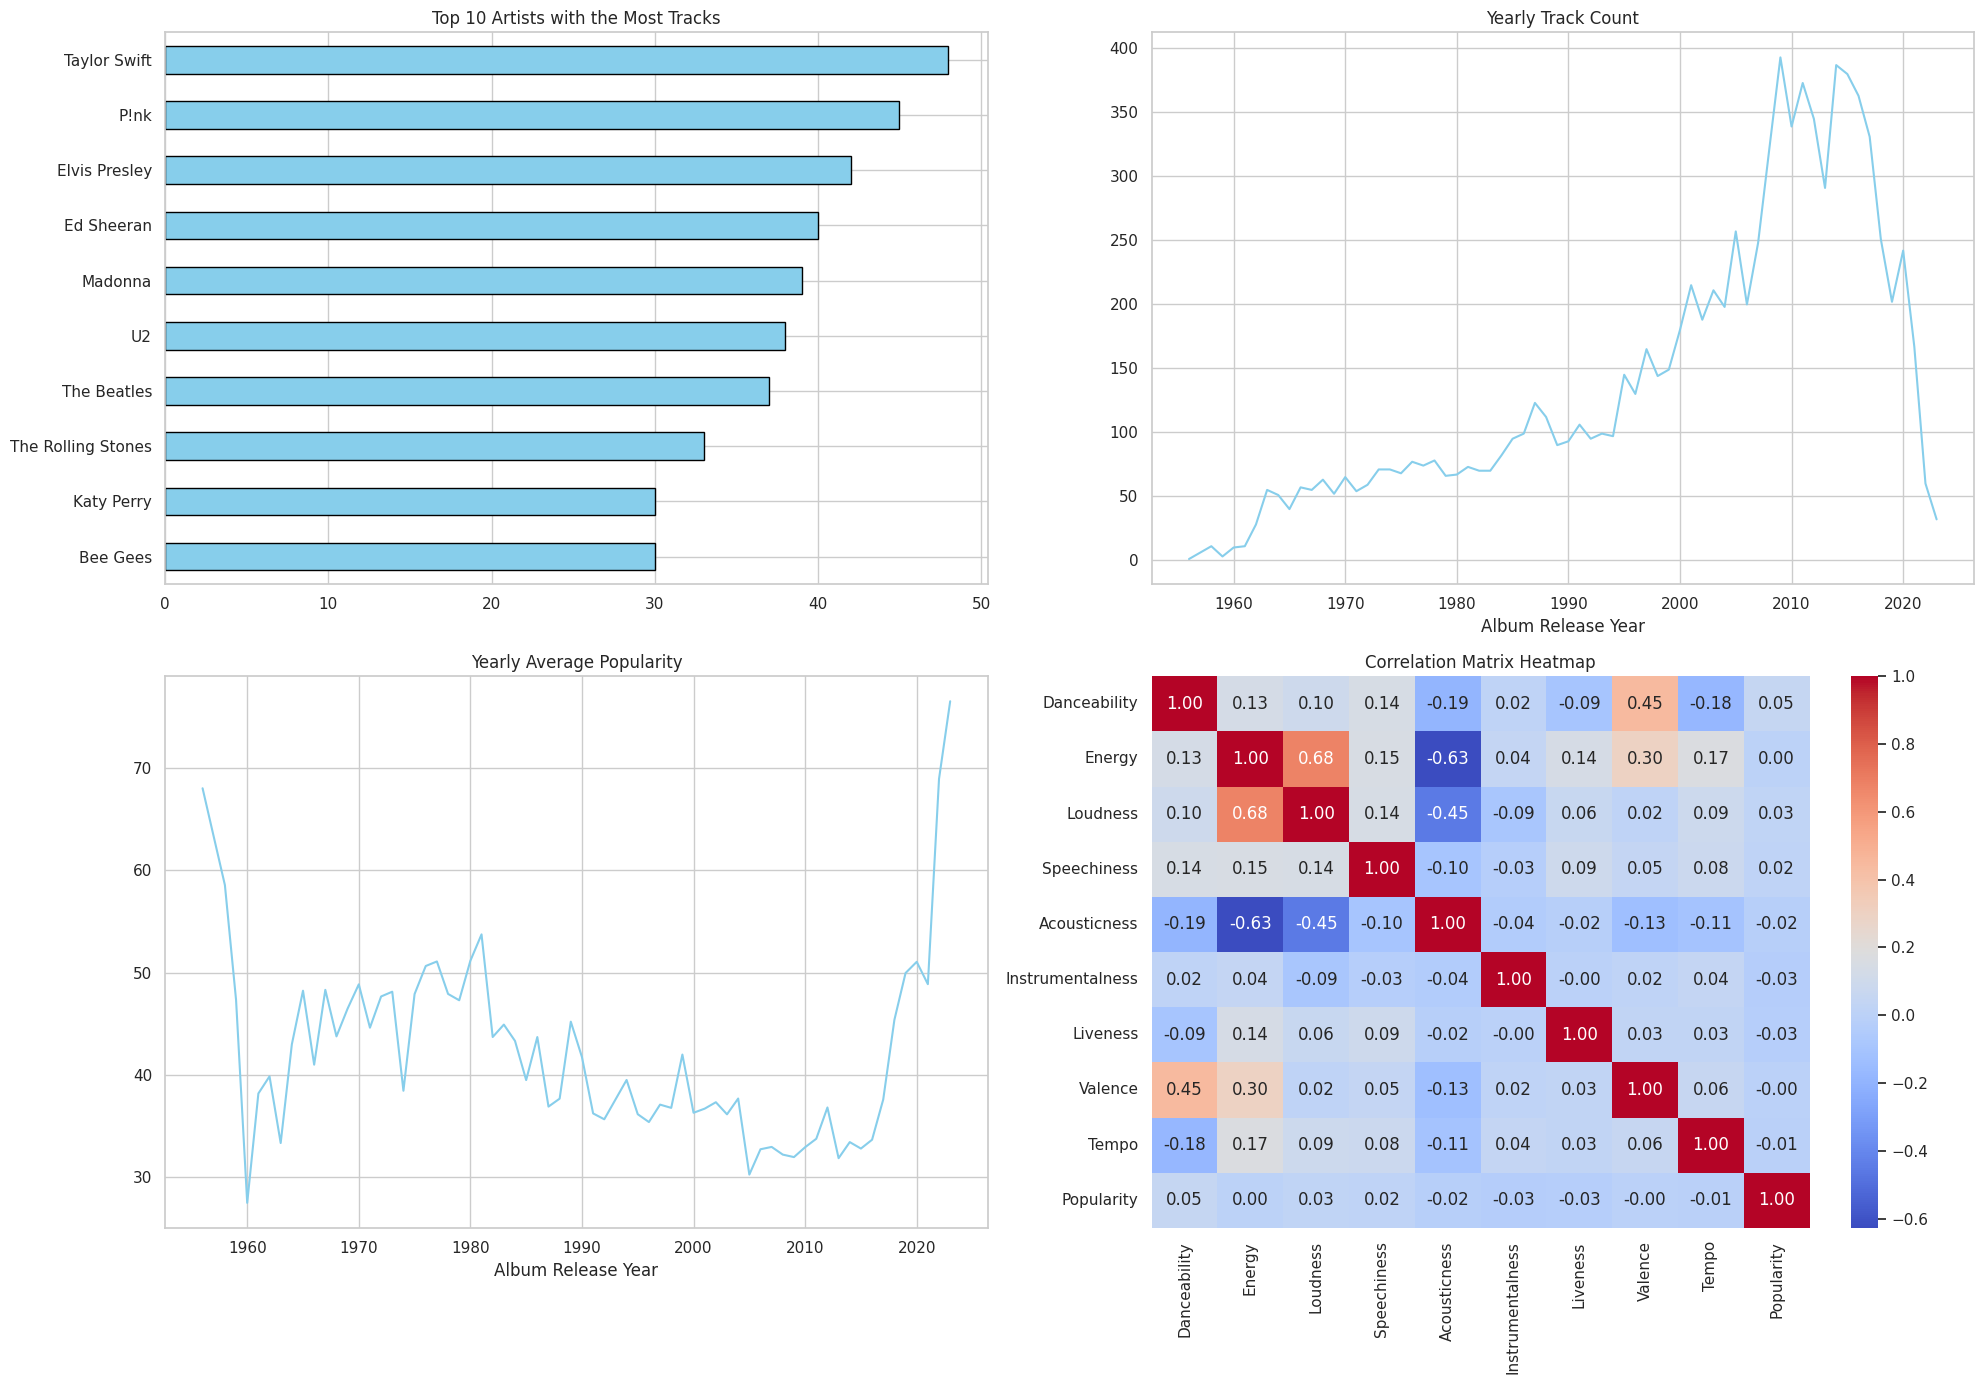

In [23]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure and axes for the plots
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot the top 10 artists with the most tracks
top_artists.plot(kind='barh', ax=axs[0, 0], color='skyblue', edgecolor='black')
axs[0, 0].set_title('Top 10 Artists with the Most Tracks')
axs[0, 0].invert_yaxis()

# Plot the yearly track count
yearly_data['Track Count'].plot(ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Yearly Track Count')

# Plot the yearly average popularity
yearly_data['Average Popularity'].plot(ax=axs[1, 0], color='skyblue')
axs[1, 0].set_title('Yearly Average Popularity')

characteristics = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity']
# Plot the correlation matrix heatmap
sns.heatmap(data[characteristics].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix Heatmap')

# Adjust the layout
plt.tight_layout()
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Track Name            9398 non-null   object        
 1   Artist Name(s)        9398 non-null   object        
 2   Album Name            9398 non-null   object        
 3   Album Artist Name(s)  9398 non-null   object        
 4   Album Release Date    9398 non-null   datetime64[ns]
 5   Track Duration (ms)   9398 non-null   int64         
 6   Explicit              9398 non-null   bool          
 7   Popularity            9398 non-null   int64         
 8   Added At              9398 non-null   object        
 9   Artist Genres         9398 non-null   object        
 10  Danceability          9398 non-null   float64       
 11  Energy                9398 non-null   float64       
 12  Key                   9398 non-null   float64       
 13  Loudness          

#### Explitity vs. Popularity

<Axes: xlabel='Popularity', ylabel='Count'>

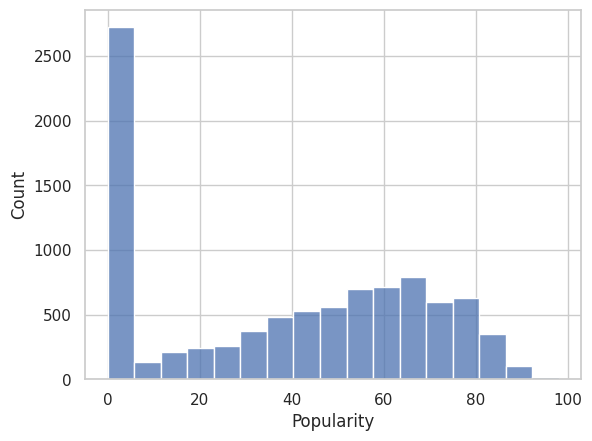

In [25]:
sns.histplot(data=data, x='Popularity')

<Axes: xlabel='Explicit', ylabel='Popularity'>

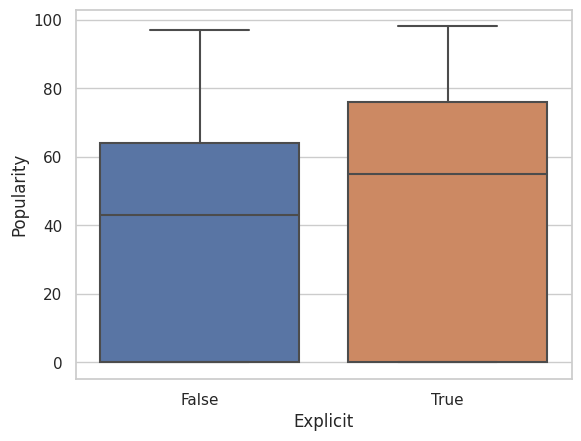

In [26]:
sns.boxplot(data=data, x='Explicit', y='Popularity')

Explicit songs are more popular :))

Distributions seems different! Let's test.

In [27]:
stat, p = mannwhitneyu(data['Explicit'], data['Popularity'])
print('stat={0:.3g}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.24e+07, p=1.24e+07
Probably different distributions


#### Energy vs. Loudness

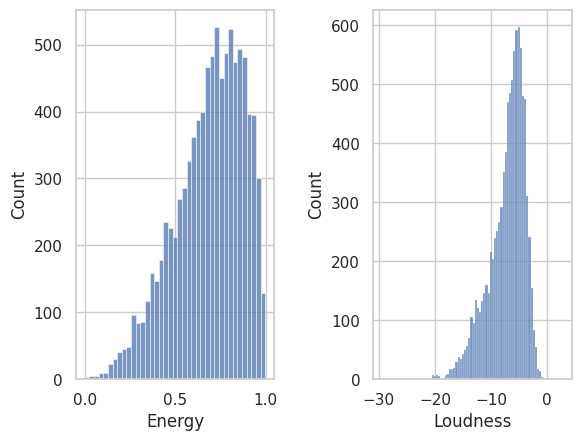

In [28]:
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Energy')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Loudness')
plt.subplots_adjust(wspace=0.5)


plt.show()

Both of them: not normal.

<Axes: xlabel='Energy', ylabel='Loudness'>

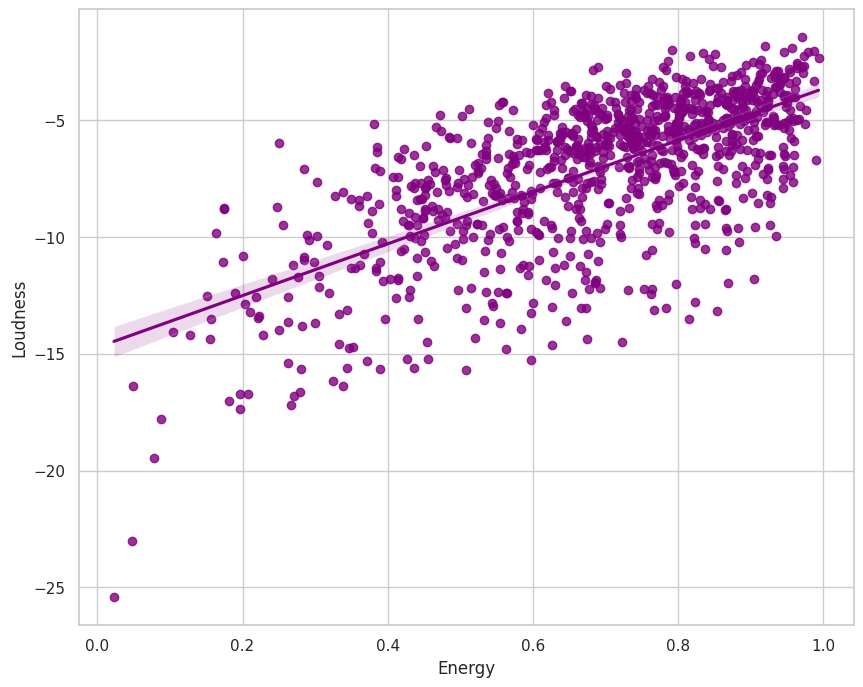

In [29]:
df1 = data.sample(int(0.1*len(df))) #for better observation!
plt.figure(figsize=(10,8))
sns.regplot(data=df1, x="Energy", y="Loudness", color="purple")

Positive linear relationship?

In [30]:
energy = data['Energy']
loudness = data['Loudness']

corr, p = pearsonr(energy, loudness)

print('corr={0:.3g}, p={0:.3g}'.format(stat, p))

if p < 0.05:
    print('There is a significant correlation between energy and loudness.')
else:
    print('There is no significant correlation between energy and loudness.')


corr=1.24e+07, p=1.24e+07
There is a significant correlation between energy and loudness.


Acually, extremely siginificant!

### significant differences in the duration of songs over the years?

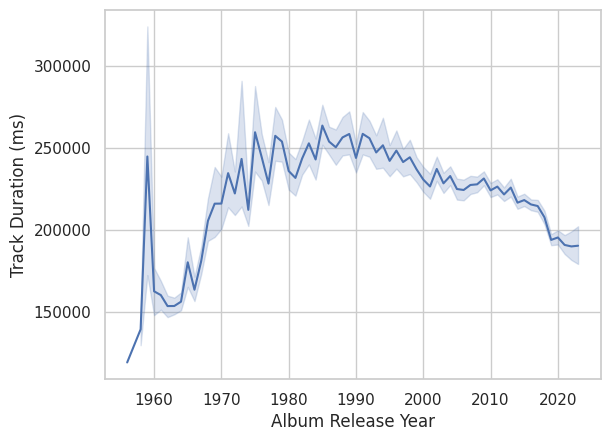

In [32]:
duration = data['Track Duration (ms)']
year = data['Album Release Year']
sns.lineplot(x = year, y = duration)
plt.show()

### Artist vs. Popularity

In [33]:
Artists = []
for Artist in data['Artist Name(s)'].unique():
    Artists.append(df[df['Artist Name(s)'] == Artist]['Popularity'])

_, p_value = kruskal(*Artists)
print(p_value)

if p < 0.05:
    print('There are significant differences in popularity across different artist name .')
else:
    print('There may not be significant differences in popularity across different artist name.')

1.63216525764612e-52
There are significant differences in popularity across different artist name .


### significant variations in the speechiness of songs across different artists?

In [34]:
Artists = []
for Artist in data['Artist Name(s)'].unique():
    Artists.append(df[df['Artist Name(s)'] == Artist]['Speechiness'])

_, p_value = kruskal(*Artists)
print(p_value)

if p < 0.05:
    print('There are significant differences in speechiness across different artist name .')
else:
    print('There may not be significant differences in speechiness across different artist name.')

nan
There are significant differences in speechiness across different artist name .


### Artist Name(s) vs. genres

In [42]:
# create contingency table
contingency_table = pd.crosstab(data['Artist Name(s)'], data['Artist Genres'])

stat, p_value, _, _ = chi2_contingency(contingency_table)

print('stat={0:.3g}, p={0:.3g}'.format(stat, p_value))

if p_value < 0.05:
    print("Probably depentent")
else:
    print("Probably independent")

stat=2.66e+07, p=2.66e+07
Probably depentent


### significant difference in the popularity scores of songs released before and after year 2000?

In [36]:
before_year = data[data['Album Release Year'] < 2000]['Popularity']
after_year = data[data['Album Release Year'] >= 2000]['Popularity']

stat, p = mannwhitneyu(before_year, after_year)
print('stat={0:.3g}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.09e+07, p=1.09e+07
Probably different distributions
